# Proyecto Final: Parametros de Hjorth

Autoras: García-Navarro A. y Montaño-Gómez L.P. 

## Adquisición de datos 
Los valores en los que se presenta al obtener datos de un electromigrama EMG es la frecuencia del voltaje a través del tiempo. La transformación de una señal analogica con valores discreto tiene como finalidad comparar y clasificar las constracciones musculares detectadas. Para ello, los datos se obtuvieron del sitio web PHYSIOBANK ATM [1] de un electrocardiograma (ECG). Se obtuvo mediante un formato .csv. Se clasificaron los datos de acuerdo a 'columnas' y 'tiempo'


In [5]:
import pandas as pd

In [6]:
'''
Se obtienen los datos de un archivo .csv
'''
archivo = 'Datos_correctos.csv'   # Leer el archivo CSV
datos = pd.read_csv(archivo)   


columna = datos["ECG I filtered' (mV)"].values   # columna de interés 
tiempo = datos["Elapsed time' (s)"].values

## Aplicación de la transformada de Fourier

Cuando se trabaja con las variaciones de frecuencias la densidad espectral de potencia o espectro de potencia es una función que muestra la distribución de la potencia o la energía existente en el espectro.


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

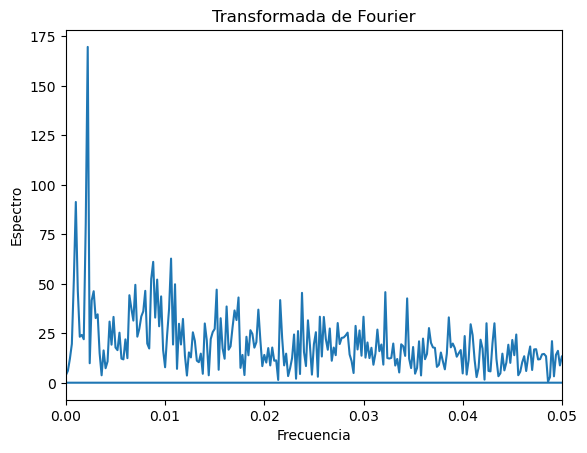

In [8]:
transformada = np.fft.fft(columna)    # Calcular la transformada de Fourier
frecuencias = np.fft.fftfreq(len(columna))     # Calcular las frecuencias 


# Graficar los resultados
plt.plot(frecuencias, np.abs(transformada))
plt.xlim(0, 0.05)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro')
plt.title('Transformada de Fourier')
plt.show()

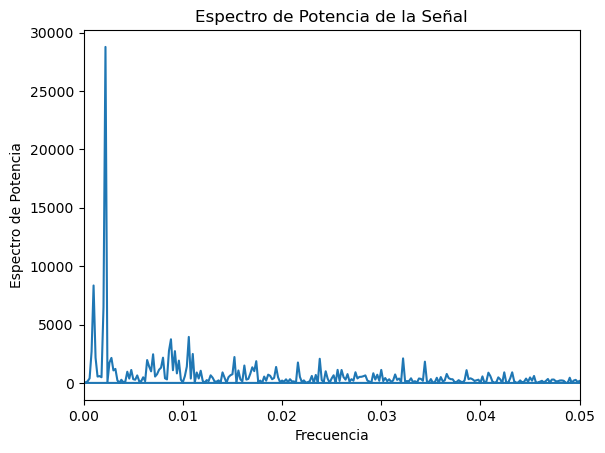

In [16]:
espectro_potencia = np.abs(transformada)**2  # espectro de potencia (magnitud al cuadrado del espectro)
# Graficar el espectro de potencia
plt.plot(frecuencias, espectro_potencia)
plt.xlim(0, 0.05)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Señal')
plt.show()

#Como la grafica es de frecuencia se usa el espectro, si se usa el tiempo es la amplitud

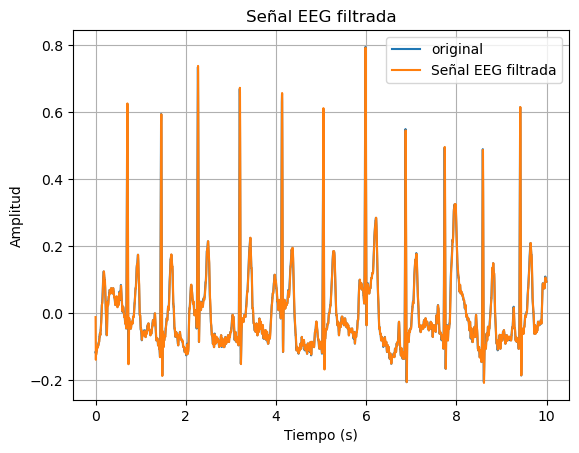

In [23]:
# filtro de paso bajo
F = 2  # Frecuencia de muestreo (Hz)
fc = 0.5  # Frecuencia de corte del filtro
order = 4  # Orden del filtro
Wn = fc / (F / 2)   #Calcular las frecuencias de corte normalizadas (f/2, es la máxima frecuencia que se puede representar)
eeg = datos["ECG I filtered' (mV)"].values  # Columna de datos de EEG 

b, a = signal.butter(order, Wn, btype='low', analog=False) #se asigna una variable a las frecuencias de corte normalizadas

filtered_eeg = signal.lfilter(b, a, eeg) #La señal filtrada

# Graficar la señal EEG filtrada
plt.plot(tiempo, eeg, label='original')
plt.plot(tiempo, filtered_eeg, label='Señal EEG filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal EEG filtrada')
plt.legend()
plt.grid(True)
plt.show()

## Manipulación de datos
Los parámetros de Hjorth son tres indicadores estadísticos utilizados para el procesamiento de señales que se desplazan a través del tiempo como es el caso de los datos de frecuencia del EMG. Estos indicadores revelan información en el dominio de la frecuencia, estan denominados por:


## Actividad
La actividad esta dada por la varianza de la amplitud de la señal en un tiempo (t).

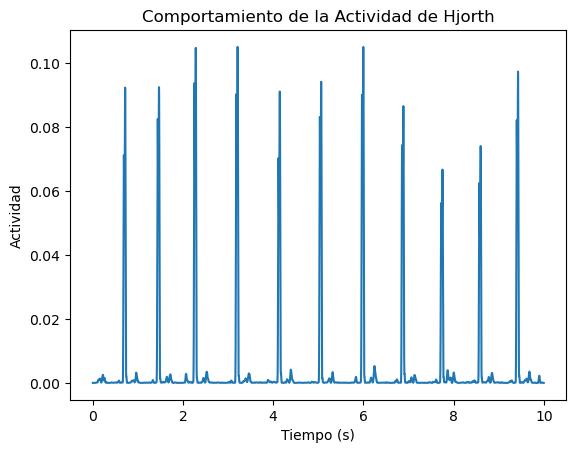

In [10]:
# Calcular la actividad/tiempo
actividad_t = np.zeros(len(tiempo))
for i in range(len(tiempo)):
    x_columna = columna[max(0, i-10):min(i+11, len(tiempo))]
    x_actividad = np.var(x_columna)
    actividad_t[i] = x_actividad

# Generar la gráfica
plt.plot(tiempo, actividad_t)
plt.xlabel('Tiempo (s)')
plt.ylabel('Actividad')
plt.title('Comportamiento de la Actividad de Hjorth')
plt.show()

## Movilidad

Es la proporción que existen entra la desviación estándar de la pendiente formada a partir de la señal y la desviación estandar de la amplitud. La movilidad es proporcional a la desviación estandar del espectro de potencia de la señal en relación con la frecuencia media.

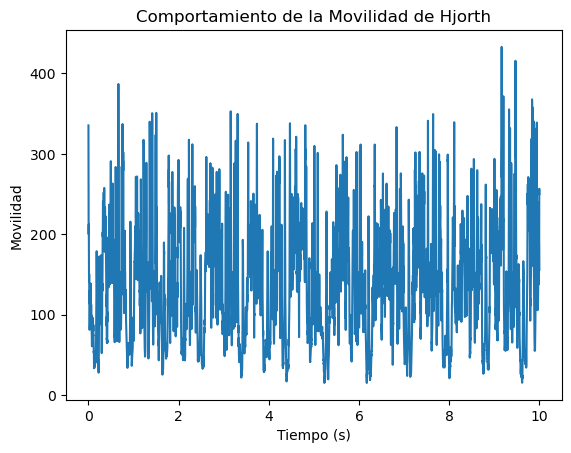

In [11]:
# Calcular la primera y segunda derivada 
primera_derivada = np.gradient(columna, tiempo)
segunda_derivada = np.gradient(primera_derivada, tiempo)

# Calcular la actividad, la movilidad y la complejidad 
actividad = np.var(columna)
movilidad = np.sqrt(np.var(primera_derivada) / actividad)
complejidad = np.sqrt(np.var(segunda_derivada) / np.var(primera_derivada))

# Calcular la movilidad para cada punto en el tiempo
movilidad_t = np.zeros(len(tiempo))
for i in range(len(tiempo)):
    x_tiempo = tiempo[max(0, i-10):min(i+11, len(tiempo))]
    x_columna = columna[max(0, i-10):min(i+11, len(tiempo))]
    x_primera_derivada = np.gradient(x_columna, x_tiempo)
    x_actividad = np.var(x_columna)
    movilidad_t[i] = np.sqrt(np.var(x_primera_derivada) / x_actividad)

# Generar la gráfica
plt.plot(tiempo, movilidad_t)
plt.xlabel('Tiempo (s)')
plt.ylabel('Movilidad')
plt.title('Comportamiento de la Movilidad de Hjorth')
plt.show()


## Complejidad
A partir de la complejidad se puede calcular la similitud de la señal senoidal que se proporciona. Por lo tanto, las desviaciones que se tengan se podría cuantificar como un incremento en la unidad, aportando información sobre el ancho de banda.

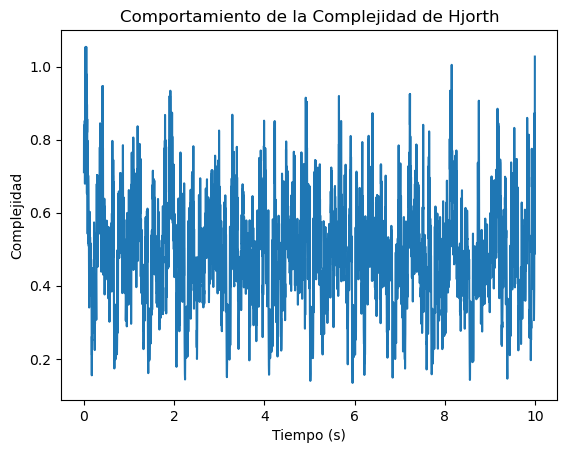

In [12]:
# Calcular la complejidad / tiempo
complejidad_t = np.zeros(len(tiempo))
for i in range(len(tiempo)):
    x_primera_derivada = np.gradient(columna[max(0, i-10):min(i+11, len(tiempo))])
    x_segunda_derivada = np.gradient(x_primera_derivada)
    complejidad_t[i] = np.sqrt(np.var(x_segunda_derivada) / np.var(x_primera_derivada))

# Generar la gráfica
plt.plot(tiempo, complejidad_t)
plt.xlabel('Tiempo (s)')
plt.ylabel('Complejidad')
plt.title('Comportamiento de la Complejidad de Hjorth')
plt.show()

# Referencias

[1]   Moody, G. B. (2022). PhysioNet. In Encyclopedia of Computational Neuroscience (pp. 2806-2808). New York, NY: Springer New York.


[2]   Martínez Albaladejo, F. J. (2014). Evaluación de técnicas computacionales para el análisis lineal de señales electroencefalográficas.

[3]   Navarro Perales, J. (2017). Clasificación de patrones de movimiento de extremidades superiores en registros electroencefalográficos basada en parámetros de Hjorth (Master's thesis, Tesis (MC)--Centro de Investigación y de Estudios Avanzados del IPN Departamento de Ingeniería Eléctrica/Sección de Bioelectrónica)